In [11]:
# importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [5]:
# importing the dataset
wine=pd.read_csv('data.csv')

In [99]:
# printing the first 5 of the data
wine.head(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [9]:
# printing the last 5 of the data
wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [13]:
# checking the shape of the data
wine.shape

(1599, 12)

In [15]:
# checking if there is any missing value
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data analysis and visualization

In [20]:
# statistical measure of the dataset
wine.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


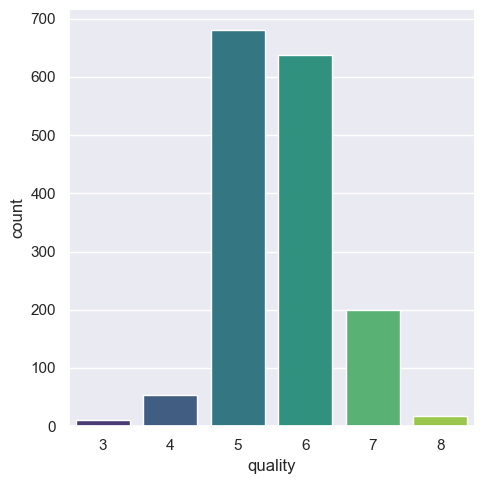

In [26]:
# number of each value in the quality column using visualization
sns.catplot(x='quality', data=wine,kind='count',palette='viridis')
plt.show()

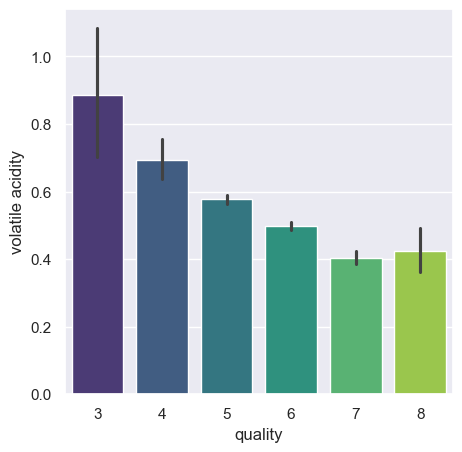

In [30]:
# volatile acidity VS quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine, palette='viridis')
plt.show()

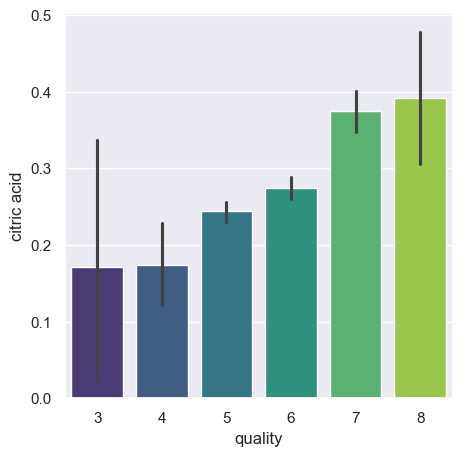

In [32]:
# citric acid VS quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine,palette='viridis')
plt.show()

In [38]:
# correlation
corr = wine.corr().round(2)

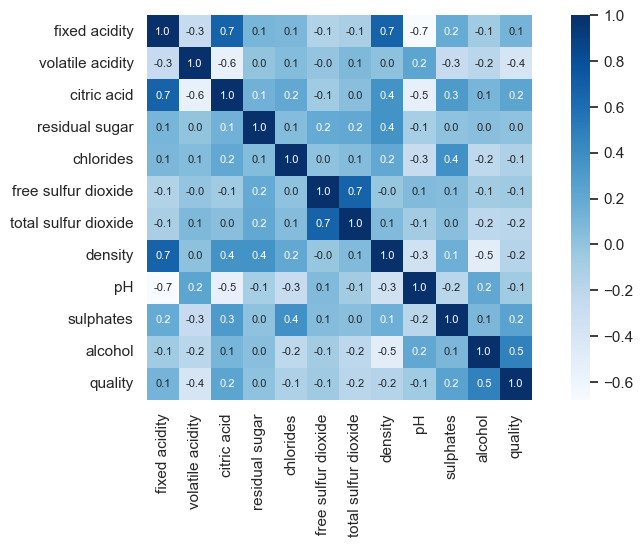

In [42]:
# visualizing using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cbar=True, square=True, fmt='.1f', annot_kws={'size':8}, cmap='Blues')
plt.show()

Data preprocesing

In [56]:
# seperate the data and label
X=wine.drop('quality', axis=1)


In [58]:
# Label Binarization
y = wine['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

Train & Test Split

In [66]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=3)

In [68]:
# checking the shapes of the split data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


Standardize the X variable

In [75]:
sc=StandardScaler()
X_train_sc =sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Model Training

In [79]:
# random forest
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_sc,y_train)
pred_rfc =rfc.predict(X_test_sc)

In [85]:
# accuracy score
print('Accuracy Score:', round(accuracy_score(y_test,pred_rfc),2))

Accuracy Score: 0.94


In [87]:
# SVC
svc =SVC()
svc.fit(X_train_sc,y_train)
pred_svc = svc.predict(X_test_sc)

In [89]:
# accuracy score
print('Accuracy Score:', round(accuracy_score(y_test,pred_svc),2))

Accuracy Score: 0.92


Building a predictive system

In [127]:
x_new = X_test.iloc[10]
x_new_sc =sc.transform([x_new])

In [129]:
rfc.predict(x_new_sc)

array([0], dtype=int64)

In [131]:
y_test.iloc[10]

0

In [179]:
# input of the raw data
x_old =(7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4)

In [181]:
# changing the input to an array
x_old_array =np.asarray(x_old)

In [183]:
# reshapeing the input
x_old_reshape =x_old_array.reshape(1,-1)

In [185]:
# prediction of the input data
pred = rfc.predict(x_old_reshape)

In [189]:
print(pred)


[0]


In [191]:
if (pred[0] == 1):
    print("Good Quality Wine")
else:
    print('Bad Quality Wine')

Bad Quality Wine
